In [73]:
# imports
import numpy as np
import keras
import matplotlib.pyplot as plt
import json # NOTE: needed to be installed iirc (called 'json' I guess)
import cv2 # NOTE: for this to work, install 'opencv' in your environment!

In [74]:
# initialize stuffs
rawData = json.load(open('/Users/iosdev/Desktop/backend/ClothesPin/ml-train/fetch-images/data.json'))

# shirts (just increase the index of 'rawData' to work on the other items; 
# we'll train a new model for each item):
shirtData = rawData['0']
shirtImageItems = shirtData['images']

listOfImageUrls = []
listOfPrices = []
arrayOfActualImages = []

numOfItems = 250 # amount of dl'ded images; make sure that it's correct!

In [75]:
# reformat data to work on it more easily

# note: the num of items will have to be manually entered, I'd guess...
# there could be a way to iterate through objects (which is what
# I guess 'rawData' is), but we have no time to find it at this point
for index in range(0, numOfItems):
    listOfImageUrls.append(shirtImageItems[str(index)]['url']) # indices are strings in the stupid object... whatever
    
for index in range(0, numOfItems):
    listOfPrices.append(shirtImageItems[str(index)]['price'])

for url in listOfImageUrls:
    
    # print(url)
    
    # read the image from the folder
    img = cv2.imread(url, cv2.IMREAD_COLOR)
    
    # print(img)
    
    arrayOfActualImages.append(img)

In [76]:
# reformatting continues (numpy stuffs)

# make numpy array from the image array (needed to use them for ml)
np_images = np.array(arrayOfActualImages)

# depending on how Python does stuffs under the hood, the order or the images vs. prices could 
# potentially be scrambled up by this point... we'll just have to hope for the best here
np_prices = np.array(listOfPrices)

# the inner arrays contain the rgb-values of the individual images.
# here we convert the values to be between 0-1 (from 0-255)
for innerArray in np_images:
    
    # this check should not be needed... for some reason though, the last element in the 
    # outer array was of 'NoneType' at one point. now that seems not to be the case anymore 
    # (even though I changed nothing...), but I'm leaving this check here just in case.
    # empty elements would f up the whole model, but we'll just have to hope for the best
    # here, due to lack of time...
    if innerArray is not None:
        innerArray = innerArray.astype('float32')
        innerArray /= 255
        # print(innerArray)

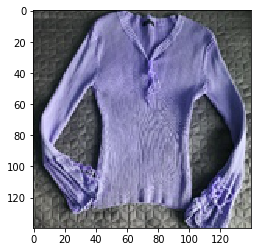

In [72]:
# print(np_prices)
# print(np_images)

# print(np_images.shape)
# print(np_prices.shape)

# print example image, to see that it all works:
image1 = np_images[0]
plt.imshow(image1, cmap = plt.cm.binary)
plt.show()

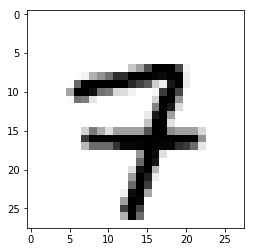

7


In [3]:
# leaving the rest of these default stuffs here for easy reference... most of this will be replaced ofc

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

exampleindex = 324
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(28 * 28,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 3.9207
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 3.4265
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 3.3605
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3366
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3217
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3164
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3094
Epoch 8/10
60000/60000 [==============================] - 1s 25us/step - loss: 3.3011
Epoch 9/10
60000/60000 [==============================] - 2s 26us/step - loss: 3.3027
Epoch 10/10
60000/60000 [==============================] - 2s 25us/step - loss: 3.2986


In [7]:
preds = model.predict(x_test)

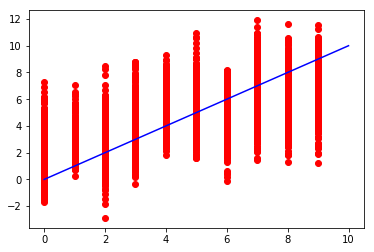

In [8]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

In [9]:
print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))

0.218
